# DB Experimental Analysis





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os



In [2]:
EXPERIMENT_RESULTS_DIR = 'experiments/results'
M1_RESULTS_DIR = f'{EXPERIMENT_RESULTS_DIR}/milestone1'



## Milestone 1

### Experiment 1: How does data size affect performance?

In [3]:
!infra_scripts/dbrun

usage: dbrun [-h] [-b] [-t] [-e] [-m MILE_NO]

Run DB Experiments

options:
  -h, --help          show this help message and exit
  -b, --build         Make the `server` and `client`
                                        executables
  -t, --test-milestone
                                        Run tests for all milestone up to <m>
  -e, --run-experiment
                                        Run experiments for milestone <m>


Additional Arguments:
  -mMILE_NO           Milestone number



In [4]:
!infra_scripts/dbrun --b

[running]:	  make
[stdout]:	  /Users/sammucyo/workspace/h/classes/cs165/mainproj/code/proj/experiments/compile.log.out
[stderr]:	  /Users/sammucyo/workspace/h/classes/cs165/mainproj/code/proj/experiments/compile.log.err

Running ...⠏ Done!
 ✅ BUILD SUCCEEDED 




#### Experiment Setup
#TODO: One paragraph about experiment setup
We will run the same K queries for 3-10 different data sizes. We will measure the total response time for all K queries. We will increase the data size by 2-10x every time. We will have exactly the same conditions every time. We will judge success based on "what we expect".

#### Explain what `!infra_scripts/dbrun -e -m 1` do?

In [5]:
# for all csv in M1_RESULTS_DIR, store them in a dictionary, key data_size and each value is a dataframe for each run
m1_data = {}

for file in os.listdir(M1_RESULTS_DIR):
    if file.endswith('.csv'):
        data_size = int(file.split('=')[1].split('run')[0])
        run = int(file.split('=')[2].split('.')[0])
        if data_size not in m1_data:
            m1_data[data_size] = {}
        df = pd.read_csv(f'{M1_RESULTS_DIR}/{file}')
        # drop test_number = 2 and = 3 since they don't scale with data size
        df = df[~df['test_number'].isin([2, 3])]
        m1_data[data_size][run] = df

m1_data.keys()

dict_keys([100000, 1000, 1000000, 10000, 100, 10000000])

In [14]:
# for each data size, make a final dataframe that has runtime_0, runtime_1, runtime_2, runtime_3, runtime_4, runtime_5
m1_final_data = {}

for data_size, runs in m1_data.items():
    final_data = pd.DataFrame()
    last_df = None
    for run, df in runs.items():
        final_data[f'runtime_{run}'] = df['runtime']
        last_df = df
    m1_final_data[data_size] = final_data
    # add other columns other than runtime
    for col in last_df.columns:
        if col != 'runtime':
            m1_final_data[data_size][col] = last_df[col]

m1_final_data.keys()

dict_keys([100000, 1000, 1000000, 10000, 100, 10000000])

In [18]:
select_n1000_run_times = m1_final_data[1000][m1_final_data[1000]['operation'] == 'select']
select_n1000_run_times

,runtime_4,runtime_2,runtime_3,runtime_1,runtime_0,operation,data_size,test_number
0,110.0,131.0,136.0,97.0,110.0,select,1000,7
4,448.0,312.0,274.0,259.0,385.0,select,1000,5
8,168.0,92.0,112.0,136.0,122.0,select,1000,9
10,39.0,38.0,38.0,60.0,66.0,select,1000,9
17,66.0,60.0,60.0,71.0,52.0,select,1000,9
19,108.0,53.0,44.0,57.0,43.0,select,1000,9
33,123.0,81.0,125.0,83.0,94.0,select,1000,6
38,76.0,65.0,98.0,54.0,28.0,select,1000,8
44,49.0,44.0,49.0,74.0,29.0,select,1000,8


In [24]:
# add a column for  runtime_avg, runtime_std, runtime_max, runtime_min
# just aggregate the runtime_0, runtime_1, runtime_2, runtime_3, runtime_4, runtime_5

for data_size, df in m1_final_data.items():
    df['runtime_avg'] = df[[f'runtime_{i}' for i in range(5)]].mean(axis=1)
    df['runtime_std'] = df[[f'runtime_{i}' for i in range(5)]].std(axis=1)
    df['runtime_max'] = df[[f'runtime_{i}' for i in range(5)]].max(axis=1)
    df['runtime_min'] = df[[f'runtime_{i}' for i in range(5)]].min(axis=1)
    df['runtime_median'] = df[[f'runtime_{i}' for i in range(5)]].median(axis=1)

In [25]:
m1_final_data[100][m1_final_data[100]['operation'] == 'select']

,runtime_4,runtime_3,runtime_2,runtime_0,runtime_1,operation,data_size,test_number,runtime_avg,runtime_std,runtime_max,runtime_min,runtime_median
0,136.0,100.0,82.0,116.0,77.0,select,100,7,102.2,24.396721,136.0,77.0,100.0
4,518.0,360.0,488.0,417.0,489.0,select,100,5,454.4,64.577860,518.0,360.0,488.0
8,120.0,178.0,104.0,74.0,120.0,select,100,9,119.2,37.857628,178.0,74.0,120.0
10,35.0,58.0,26.0,19.0,44.0,select,100,9,36.4,15.306861,58.0,19.0,35.0
17,165.0,50.0,54.0,28.0,50.0,select,100,9,69.4,54.413234,165.0,28.0,50.0
19,65.0,53.0,39.0,29.0,98.0,select,100,9,56.8,26.780590,98.0,29.0,53.0
33,155.0,124.0,99.0,120.0,109.0,select,100,6,121.4,21.173096,155.0,99.0,120.0
38,50.0,30.0,99.0,56.0,34.0,select,100,8,53.8,27.480902,99.0,30.0,50.0
44,45.0,26.0,28.0,43.0,54.0,select,100,8,39.2,11.903781,54.0,26.0,43.0


In [26]:
m1_final_data[1000][m1_final_data[1000]['operation'] == 'select']

,runtime_4,runtime_2,runtime_3,runtime_1,runtime_0,operation,data_size,test_number,runtime_avg,runtime_std,runtime_max,runtime_min,runtime_median
0,110.0,131.0,136.0,97.0,110.0,select,1000,7,116.8,16.238842,136.0,97.0,110.0
4,448.0,312.0,274.0,259.0,385.0,select,1000,5,335.6,79.519180,448.0,259.0,312.0
8,168.0,92.0,112.0,136.0,122.0,select,1000,9,126.0,28.425341,168.0,92.0,122.0
10,39.0,38.0,38.0,60.0,66.0,select,1000,9,48.2,13.682105,66.0,38.0,39.0
17,66.0,60.0,60.0,71.0,52.0,select,1000,9,61.8,7.155418,71.0,52.0,60.0
19,108.0,53.0,44.0,57.0,43.0,select,1000,9,61.0,26.935107,108.0,43.0,53.0
33,123.0,81.0,125.0,83.0,94.0,select,1000,6,101.2,21.405607,125.0,81.0,94.0
38,76.0,65.0,98.0,54.0,28.0,select,1000,8,64.2,25.965362,98.0,28.0,65.0
44,49.0,44.0,49.0,74.0,29.0,select,1000,8,49.0,16.201852,74.0,29.0,49.0


In [ ]:
m1_final_data[10000][m1_final_data[10000]['operation'] == 'select']

In [28]:
m1_final_data[100000][m1_final_data[100000]['operation'] == 'select']

,runtime_3,runtime_2,runtime_0,runtime_1,runtime_4,operation,data_size,test_number,runtime_avg,runtime_std,runtime_max,runtime_min,runtime_median
0,677.0,763.0,807.0,791.0,660.0,select,100000,7,739.6,67.058184,807.0,660.0,763.0
4,1494.0,1620.0,1688.0,1977.0,1693.0,select,100000,5,1694.4,177.201298,1977.0,1494.0,1688.0
8,892.0,1108.0,848.0,891.0,1004.0,select,100000,9,948.6,106.206403,1108.0,848.0,892.0
10,575.0,584.0,494.0,648.0,522.0,select,100000,9,564.6,59.664060,648.0,494.0,575.0
17,764.0,786.0,665.0,603.0,593.0,select,100000,9,682.2,89.429861,786.0,593.0,665.0
19,558.0,481.0,496.0,453.0,540.0,select,100000,9,505.6,42.991860,558.0,453.0,496.0
33,818.0,756.0,731.0,951.0,1084.0,select,100000,6,868.0,147.781934,1084.0,731.0,818.0
38,476.0,890.0,991.0,943.0,962.0,select,100000,8,852.4,213.612500,991.0,476.0,943.0
44,408.0,579.0,624.0,528.0,842.0,select,100000,8,596.2,159.339888,842.0,408.0,579.0


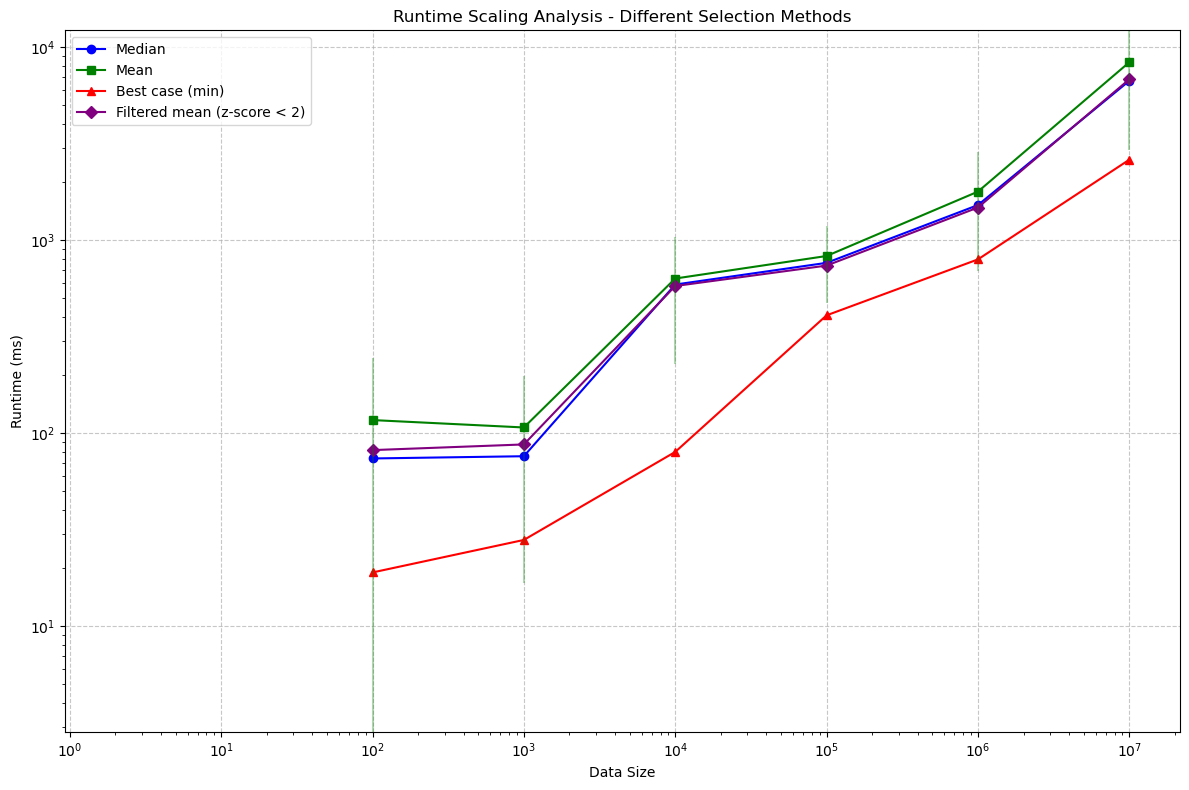

In [32]:
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
from scipy import stats

def analyze_runtimes(data_dict):
    """
    Analyzes runtime data using different selection methods and creates comparison plots.
    
    Args:
        data_dict: Dictionary with data_size as keys and DataFrames of measurements as values
    """
    # Prepare data structures for different methods
    sizes = []
    medians = []
    means = []
    mins = []
    filtered_means = []  # Will store means after removing outliers
    
    for size, df in sorted(data_dict.items()):
        select_df = df[df['operation'] == 'select']
        if len(select_df) == 0:
            continue
            
        sizes.append(size)
        
        # Get runtime columns
        runtime_cols = [col for col in select_df.columns if col.startswith('runtime_') and col[8].isdigit()]
        all_runtimes = []
        for _, row in select_df.iterrows():
            all_runtimes.extend(row[runtime_cols])
            
        # Different methods for selecting representative runtime
        medians.append(np.median(all_runtimes))
        means.append(np.mean(all_runtimes))
        mins.append(np.min(all_runtimes))
        
        # Filtered mean: remove outliers using z-score
        z_scores = stats.zscore(all_runtimes)
        filtered_data = [x for x, z in zip(all_runtimes, z_scores) if abs(z) < 2]
        filtered_means.append(np.mean(filtered_data) if filtered_data else np.mean(all_runtimes))
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    plt.plot(sizes, medians, 'o-', label='Median', color='blue')
    plt.plot(sizes, means, 's-', label='Mean', color='green')
    plt.plot(sizes, mins, '^-', label='Best case (min)', color='red')
    plt.plot(sizes, filtered_means, 'D-', label='Filtered mean (z-score < 2)', color='purple')
    
    plt.xlabel('Data Size')
    plt.ylabel('Runtime (ms)')
    plt.title('Runtime Scaling Analysis - Different Selection Methods')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    
    # Use log scale if data sizes span multiple orders of magnitude
    if max(sizes) / min(sizes) > 100:
        plt.xscale('log')
        plt.yscale('log')
    
    # Add error bars to mean plot
    yerr = []
    for size, df in sorted(data_dict.items()):
        select_df = df[df['operation'] == 'select']
        if len(select_df) == 0:
            continue
        runtime_cols = [col for col in select_df.columns if col.startswith('runtime_') and col[8].isdigit()]
        all_runtimes = []
        for _, row in select_df.iterrows():
            all_runtimes.extend(row[runtime_cols])
        yerr.append(np.std(all_runtimes))
    
    plt.errorbar(sizes, means, yerr=yerr, fmt='none', color='green', alpha=0.3)
    
    plt.tight_layout()
    return plt.gcf()

# Example usage:
# Assuming m1_final_data is a dictionary with data_size as keys and DataFrames as values
fig = analyze_runtimes(m1_final_data)
plt.show()

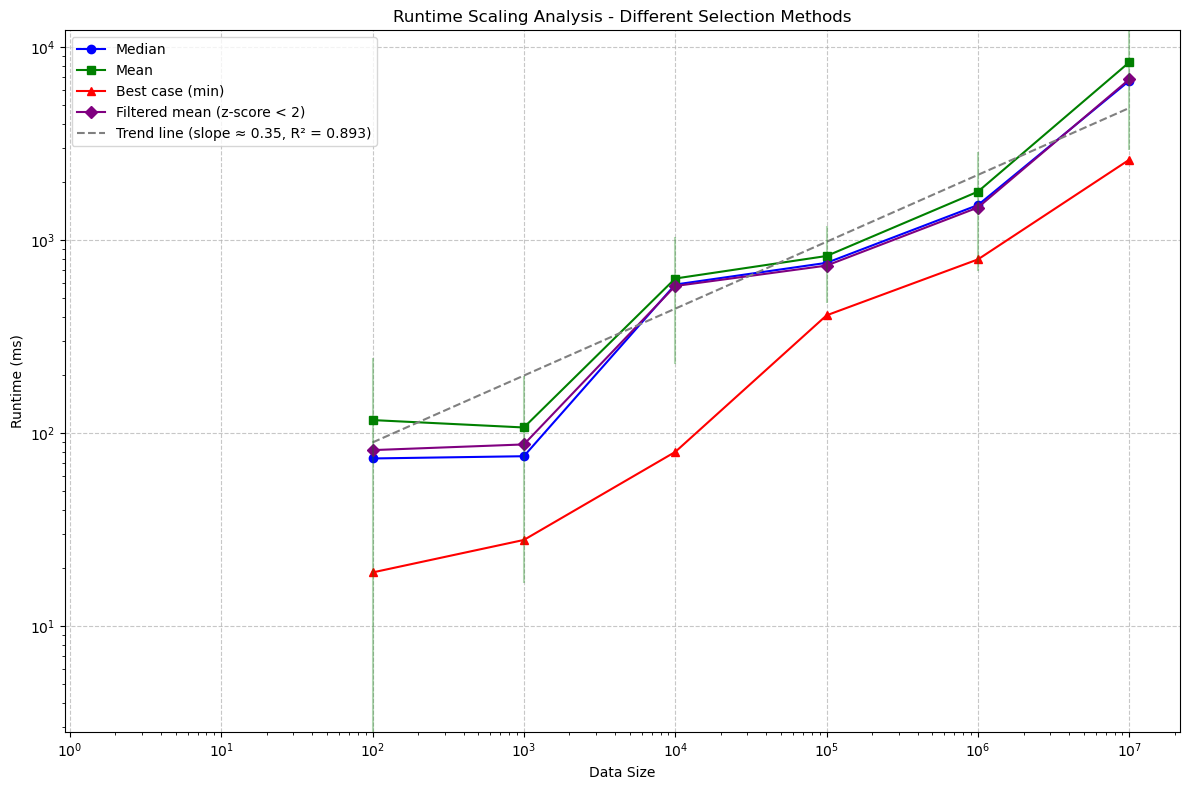

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

def linear_fit(x, a, b):
    """Linear function for fitting: f(x) = ax + b"""
    return a * x + b

def analyze_runtimes_with_trend(data_dict):
    """
    Analyzes runtime data and adds trend line analysis for O(n) validation.
    """
    # Previous data collection code
    sizes = []
    medians = []
    means = []
    mins = []
    filtered_means = []
    
    for size, df in sorted(data_dict.items()):
        select_df = df[df['operation'] == 'select']
        if len(select_df) == 0:
            continue
            
        sizes.append(size)
        
        runtime_cols = [col for col in select_df.columns if col.startswith('runtime_') and col[8].isdigit()]
        all_runtimes = []
        for _, row in select_df.iterrows():
            all_runtimes.extend(row[runtime_cols])
            
        medians.append(np.median(all_runtimes))
        means.append(np.mean(all_runtimes))
        mins.append(np.min(all_runtimes))
        
        z_scores = stats.zscore(all_runtimes)
        filtered_data = [x for x, z in zip(all_runtimes, z_scores) if abs(z) < 2]
        filtered_means.append(np.mean(filtered_data) if filtered_data else np.mean(all_runtimes))
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    plt.plot(sizes, medians, 'o-', label='Median', color='blue')
    plt.plot(sizes, means, 's-', label='Mean', color='green')
    plt.plot(sizes, mins, '^-', label='Best case (min)', color='red')
    plt.plot(sizes, filtered_means, 'D-', label='Filtered mean (z-score < 2)', color='purple')
    
    # Add trend line analysis for median values (using log-log space for linear fit)
    log_sizes = np.log10(sizes)
    log_medians = np.log10(medians)
    
    # Fit line to data points after 10^4 (where behavior seems more stable)
    mask = np.array(sizes) >= 1e4
    if np.any(mask):
        slope, intercept, r_value, _, _ = stats.linregress(log_sizes[mask], log_medians[mask])
        
        # Plot trend line
        x_trend = np.array([sizes[0], sizes[-1]])
        y_trend = 10**(slope * np.log10(x_trend) + intercept)
        plt.plot(x_trend, y_trend, '--', color='gray', 
                label=f'Trend line (slope ≈ {slope:.2f}, R² = {r_value**2:.3f})')
        
    plt.xlabel('Data Size')
    plt.ylabel('Runtime (ms)')
    plt.title('Runtime Scaling Analysis - Different Selection Methods')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    
    plt.xscale('log')
    plt.yscale('log')
    
    # Add error bars to mean plot
    yerr = []
    for size, df in sorted(data_dict.items()):
        select_df = df[df['operation'] == 'select']
        if len(select_df) == 0:
            continue
        runtime_cols = [col for col in select_df.columns if col.startswith('runtime_') and col[8].isdigit()]
        all_runtimes = []
        for _, row in select_df.iterrows():
            all_runtimes.extend(row[runtime_cols])
        yerr.append(np.std(all_runtimes))
    
    plt.errorbar(sizes, means, yerr=yerr, fmt='none', color='green', alpha=0.3)
    
    plt.tight_layout()
    return plt.gcf()

# Example usage:
fig = analyze_runtimes_with_trend(m1_final_data)
plt.show()

#### Result Graph & Explanation Graph

TODO: One result graph (e.g., response time) and One explanation graph (e.g., cache misses)


In [10]:
# plot runtime vs data size
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=select_runtimes, x='data_size', y='runtime', hue='test_number', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title('Select Query Runtimes')
plt.xlabel('Data Size')
plt.ylabel('Runtime (μs)')

plt.show()

NameError: name 'select_runtimes' is not defined

<Figure size 1200x600 with 0 Axes>

#### Discussion

TODO: One paragraph discussing the result graph

TODO: One paragraph discussing the explanation graph


### Experiment 2: How does basic statistics collection on fetch affect performance?

Fetch with Stat collection vs. Fetch without Stat collection

#### Experiment Setup
#TODO: One paragraph about experiment setup
We will run the same K queries for 3-10 different data sizes. We will measure the total response time for all K queries. We will increase the data size by 2-10x every time. We will have exactly the same conditions every time. We will judge success based on "what we expect".


#### Result Graph & Explanation Graph

TODO: One result graph (e.g., response time) and One explanation graph (e.g., cache misses)


In [ ]:
# aggregate operations: sum, avg, min, max
agg_ops = ['sum', 'avg', 'min', 'max']

agg_runtimes = df1[df1['operation'].isin(agg_ops)]

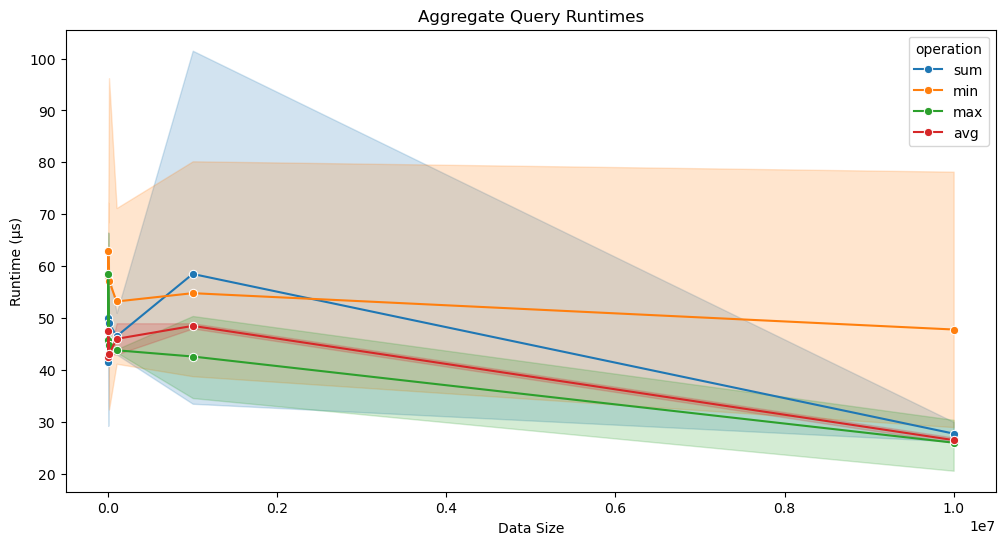

In [ ]:
# plot runtime vs data size on a normal scale
plt.figure(figsize=(12, 6))
sns.lineplot(data=agg_runtimes, x='data_size', y='runtime', hue='operation', marker='o')
plt.title('Aggregate Query Runtimes')
plt.xlabel('Data Size')
plt.ylabel('Runtime (μs)')
plt.show()



#### Discussion

TODO: One paragraph discussing the result graph

TODO: One paragraph discussing the explanation graph


## Milestone 2

### Experiment 3: How does the number of concurrent queries affect performance? (Single-core)

1. For the same data size, try Z different batch sizes of queries
2. Measure total response time for each batch size of queries
How does the number of concurrent queries affect performance?
3. Increase batch size by 2-10x every time
4. Have exactly the same conditions every time
5. Judge success based on “what we expect”
6. Explain the results

#### Experiment Setup
#TODO: One paragraph about experiment setup
We will run the same K queries for 3-10 different data sizes. We will measure the total response time for all K queries. We will increase the data size by 2-10x every time. We will have exactly the same conditions every time. We will judge success based on "what we expect".


#### Result Graph & Explanation Graph

TODO: One result graph (e.g., response time) and One explanation graph (e.g., cache misses)


In [ ]:
# some code

#### Discussion

TODO: One paragraph discussing the result graph

TODO: One paragraph discussing the explanation graph


### Experiment 4: How does the number of concurrent queries affect performance? (Multi-core)

#### Experiment Setup
#TODO: One paragraph about experiment setup
We will run the same K queries for 3-10 different data sizes. We will measure the total response time for all K queries. We will increase the data size by 2-10x every time. We will have exactly the same conditions every time. We will judge success based on "what we expect".


#### Result Graph & Explanation Graph

TODO: One result graph (e.g., response time) and One explanation graph (e.g., cache misses)


In [ ]:
# some code

#### Discussion

TODO: One paragraph discussing the result graph

TODO: One paragraph discussing the explanation graph


## Milestone 3

### Experiment 5: Scan vs. Index Selection

#### Experiment Setup
#TODO: One paragraph about experiment setup
We will run the same K queries for 3-10 different data sizes. We will measure the total response time for all K queries. We will increase the data size by 2-10x every time. We will have exactly the same conditions every time. We will judge success based on "what we expect".


#### Result Graph & Explanation Graph

TODO: One result graph (e.g., response time) and One explanation graph (e.g., cache misses)


In [ ]:
# some code

#### Discussion

TODO: One paragraph discussing the result graph

TODO: One paragraph discussing the explanation graph


### Experiment 6: Btree vs. Sorted Index Selection

#### Experiment Setup
#TODO: One paragraph about experiment setup
We will run the same K queries for 3-10 different data sizes. We will measure the total response time for all K queries. We will increase the data size by 2-10x every time. We will have exactly the same conditions every time. We will judge success based on "what we expect".


#### Result Graph & Explanation Graph

TODO: One result graph (e.g., response time) and One explanation graph (e.g., cache misses)


In [ ]:
# some code

#### Discussion

TODO: One paragraph discussing the result graph

TODO: One paragraph discussing the explanation graph


## Milestone 4